In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


## Schéma explicite ##

In [14]:
T = 1
l = 1
M = 101
N = 4 * M ** 2
xx = linspace(0, l, M)
yy = linspace(0, 1 ,M)
h = l / (M - 1)
k = T / (N - 1)
ll = k / h ** 2

In [15]:
X, Y = meshgrid(xx, yy)
U0 = exp(-50 * (((X - l / 2) ** 2) + (Y - l / 2) ** 2))

In [16]:
e = ones(M)
ee = ones(M - 1)
LM = -2 * diag(e) + diag(ee, 1) + diag(ee, -1)

In [17]:
V = U0
for i in range(N):
    V = V + ll * (dot(LM, V) + dot(V, LM)) 

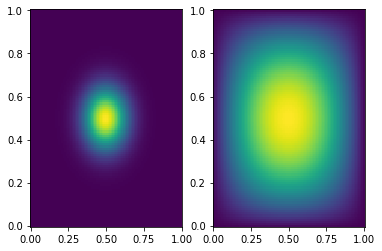

In [18]:
ax1 = subplot(121)
ax2 = subplot(122)
ax1.pcolormesh(X, Y, U0, shading='auto')
ax2.pcolormesh(X, Y, V, shading='auto')
show()

## Schéma de Cranck Nicholson ##

In [7]:
T = 1
l = 1
M = 101
N = 3 * M 
xx = linspace(0, l, M)
yy = linspace(0, 1 ,M)
h = l / (M - 1)
k = T / (N - 1)
ll = k / h ** 2

In [8]:
def f(X, lam = ll):
    _, n = shape(X)
    e = ones(n)
    ee = ones(n - 1)
    L = -2 * diag(e) + diag(ee, 1) + diag(ee, -1)
    return X - (lam / 2) * (dot(L, X) + dot(X, L)) 

In [9]:
def b(X, lam = ll):
    _, n = shape(X)
    e = ones(n)
    ee = ones(n - 1)
    L = -2 * diag(e) + diag(ee, 1) + diag(ee, -1)
    return X + (lam / 2) * (dot(L, X) + dot(X, L)) 
    

On utilise ici le gradient à pas fixe!

In [10]:
def gradfixe(B, X0, p, tol = 10 **(-6)):
    X = X0
    res = f(X) - B
    while norm(res) > tol:
        X = X - p * res
        res = f(X) - B
    return X

In [11]:
U = U0
for i in range(N):
    U = gradfixe(b(U), U, 0.01, tol = 10 **(-2))

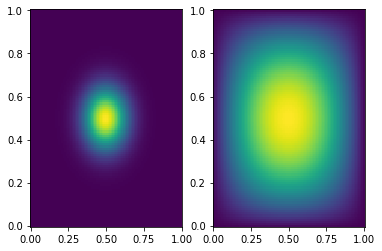

In [21]:
ax1 = subplot(121)
ax2 = subplot(122)
ax1.pcolormesh(X, Y, U0, shading='auto')
ax2.pcolormesh(X, Y, U, shading='auto')
show()